In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import math as m
import random as rnd
from pathlib import Path
import os
from moviepy.editor import VideoFileClip
from IPython.display import HTML
%matplotlib inline


In [12]:
from utils.calibration import clalibrate_camera, getPerspectiveTransformMatrix
from utils.tresholding import get_tresholded_img
from utils.lane_detection import LaneDetector, hist

In [3]:
calibration_images = [cv2.imread('camera_cal/'+img) for img in os.listdir("camera_cal/")]
mtx, dist, rvecs, tvecs, _, _ = clalibrate_camera(calibration_images)


In [4]:
M,Minv = getPerspectiveTransformMatrix()

In [5]:
def cut_edges_(img,length = 200):
    img[:,0:length] = 0
    img[:,img.shape[1] - length:img.shape[1]] = 0

In [6]:
test_img = cv2.imread('challenge/frame0050.jpeg')
# test_img = cv2.imread('project/frame0703.jpeg')
# test_img = cv2.imread('project/frame0596.jpeg')


# test_img = cv2.imread('test_images/straight_lines2.jpg')
test_img = cv2.undistort(test_img, mtx, dist, None)

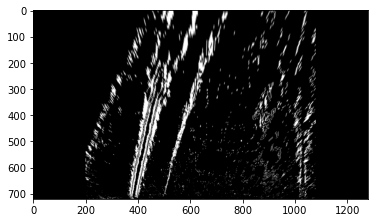

In [7]:
tresholded_img, hoffed = get_tresholded_img(test_img)
tresholded_img = cv2.warpPerspective(tresholded_img,M,None)
tresholded_hoffed = cv2.warpPerspective(hoffed,M,None)
cut_edges_(tresholded_img)
cut_edges_(tresholded_hoffed)
plt.imshow(tresholded_img, cmap='gray')

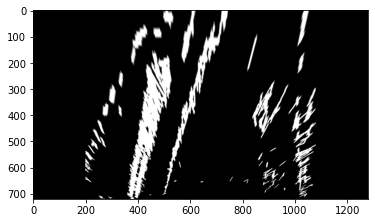

In [8]:
plt.imshow(tresholded_hoffed, cmap='gray')

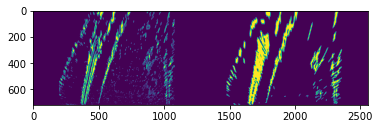

In [9]:
    plt.imshow(np.concatenate([tresholded_img.T,tresholded_hoffed.T]).T)

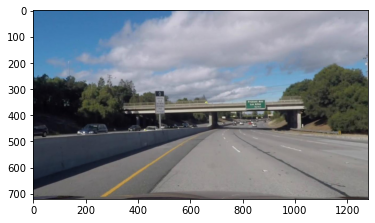

In [10]:
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))

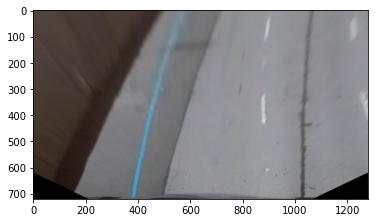

In [11]:
plt.imshow(cv2.warpPerspective(test_img,M,None))

In [13]:
plt.imshow(LaneDetector().get_lanes(tresholded_img,tresholded_hoffed))

NameError: name 'LaneDetector' is not defined

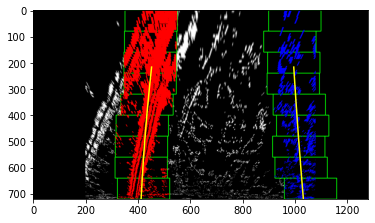

In [515]:
plt.imshow(LaneDetector().get_lanes(tresholded_img, tresholded_hoffed, True))

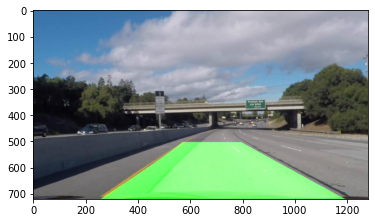

In [14]:
result_mask =  cv2.warpPerspective(LaneDetector().get_lanes(tresholded_img,tresholded_hoffed),Minv,None)
result = np.copy(test_img)
result[result_mask != 0] = result_mask[result_mask != 0]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [15]:
class Processor:
    def __init__(self):
        self.i = 0
        self.detector = LaneDetector()
    def add_text_(self,img,text):    
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (30,40)
        fontScale              = 1
        fontColor              = (255,255,255)
        lineType               = 2

        cv2.putText(img,text, 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)
    def cut_edges_(self,img,length = 200):
        img[:,0:length] = 0
        img[:,img.shape[1] - length:img.shape[1]] = 0
    def process_image(self,image):
        undistorted = cv2.undistort(image, mtx, dist, None)
        tresholded_img, hoffed = get_tresholded_img(undistorted)
        warped = cv2.warpPerspective(tresholded_img,M,None)
        warped_hoffed = cv2.warpPerspective(hoffed,M,None)
        self.cut_edges_(warped)
        self.cut_edges_(warped_hoffed)
        lanes = self.detector.get_lanes(warped,warped_hoffed, enable_smothing=False, enable_drop_fix=True)
        result_mask =  cv2.warpPerspective(lanes,Minv,None)
        result = np.copy(image)
        result[result_mask != 0] = result_mask[result_mask != 0]
        self.add_text_(result,str(self.i))
        self.i +=1
        
#         result = np.concatenate([result,np.dstack((warped_hoffed, warped_hoffed, warped_hoffed))])
        return result
    

In [16]:
output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")
# output = 'challenge_video_out.mp4'
# clip1 = VideoFileClip("challenge_video.mp4")
# output = 'harder_challenge_video_out.mp4'
# clip1 = VideoFileClip("harder_challenge_video.mp4")

In [584]:

# clip1 = clip1.subclip(0,3)
processor = Processor()
clip = clip1.fl_image(processor.process_image) #NOTE: this function expects color images!!
%time clip.write_videofile(output, audio=False)


t:   0%|                                                                            | 0/1260 [00:00<?, ?it/s, now=None]

Moviepy - Building video project_video_out.mp4.
Moviepy - Writing video project_video_out.mp4




t:  11%|██████▉                                                           | 133/1260 [00:28<03:57,  4.75it/s, now=None]


t:  21%|█████████████▉                                                    | 265/1260 [00:56<03:31,  4.71it/s, now=None]


t:  32%|████████████████████▊                                             | 397/1260 [01:24<03:02,  4.72it/s, now=None]


t:  42%|███████████████████████████▋                                      | 529/1260 [01:52<02:38,  4.62it/s, now=None]


t:  52%|██████████████████████████████████▌                               | 661/1260 [02:22<02:08,  4.66it/s, now=None]


t:  63%|█████████████████████████████████████████▌                        | 793/1260 [02:50<01:38,  4.74it/s, now=None]


t:  73%|████████████████████████████████████████████████▍                 | 925/1260 [03:18<01:11,  4.69it/s, now=None]


t:  84%|██████████████████████████████████████████████████████▌          | 1057/1260 [03:47<00:44,  4.52it/s, now=None]


t:  94%|█████████████████████████████████████████████████████████████▎   | 1189/1260 [04:16<00:15,  4.64it/s, now=None]


t:  99%|███████████████████████████████████████████████████████████████▎| 480/485 [28:32:45<00:00,  6.48it/s, now=None]

Moviepy - Done !
Moviepy - video ready project_video_out.mp4
Wall time: 4min 32s


In [585]:
processor.detector.print_stats()

Recalcs: 1261, Fits_changed: 740


In [17]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

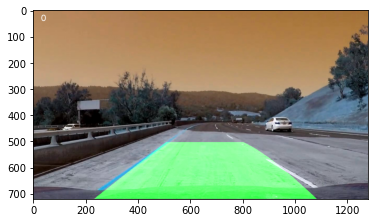

In [16]:
proc = Processor()
proc_image = cv2.imread('project/frame0596.jpeg')
# proc_image = cv2.imread('project/frame0703.jpeg')
# proc_image = cv2.imread('challenge/frame0090.jpeg')
plt.imshow(proc.process_image(proc_image))

In [371]:
# clip1.write_images_sequence('challenge/frame%04d.jpeg')

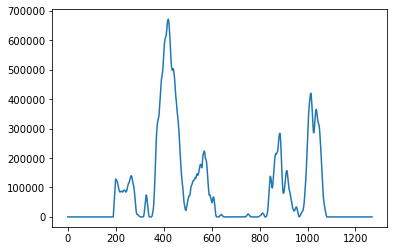

In [20]:
plt.plot(hist(tresholded_hoffed))

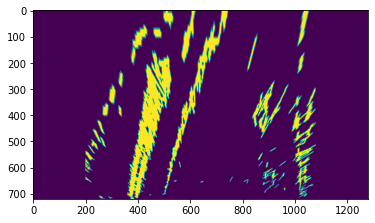

In [21]:
plt.imshow (tresholded_hoffed)

In [365]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def hist(img,hist_window = 5, y_k = 2):
    ylen = int(img.shape[0] / y_k)
    
    bottom_half = img[ylen:,:]
    
    histogram = np.sum(bottom_half, axis=0)
    histogram = [np.sum(histogram[dot-hist_window:dot+hist_window]) for dot in np.arange(hist_window, len(histogram) - hist_window)]
#     histogram =[np.mean(histogram[dot-hist_window:dot+hist_window]) for dot in np.arange(hist_window, len(histogram) - hist_window)]

    histogram = np.array(histogram)
    
    return histogram

def get_r_and_l_mid_(img):
    
    hist_window = 5
    histogram = hist(img,hist_window)
    deep_hist = hist(img,hist_window,10)
    
    midpoint = np.int(histogram.shape[0]//2)
    leftx_weight = histogram[np.argmax(histogram[:midpoint])]
    rightx_weight = histogram[midpoint+np.argmax(histogram[midpoint:])]
    
    leftx_base = np.argmax(histogram[:midpoint]) +hist_window
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint + hist_window
    if(leftx_weight > (3*rightx_weight)):
        r_hist = deep_hist[midpoint:]
        rightx_base = np.argmax(r_hist)+ midpoint + hist_window
    if(rightx_weight > (3*leftx_weight)):
        l_hist = deep_hist[:midpoint]
        leftx_base = np.argmax(l_hist)+ hist_window
    
    return leftx_base,rightx_base
    
    

def search_around_poly_(binary_warped,left_fit,right_fit, margin = 100):
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    left_lane_inds = None
    right_lane_inds = None
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
                    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
                    left_fit[1]*nonzeroy + left_fit[2] + margin)))
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
                    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
                    right_fit[1]*nonzeroy + right_fit[2] + margin)))
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    return leftx, lefty, rightx, righty

def find_lane_pixels_(binary_warped,warped_hoffed = None, nwindows = 9, margin = 100, minpix = 50):
    hist_img = binary_warped
    hist_window = 5
    if warped_hoffed is not None:
        hist_img = warped_hoffed
    
    histogram = hist(hist_img,hist_window)
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint]) +hist_window
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint + hist_window
    
    leftx_base,rightx_base = get_r_and_l_mid_(hist_img)
#     road = 500
#     if rightx_base == midpoint + hist_window:
#         rightx_base = leftx_base + road
#     if leftx_base == 0:
#         leftx_base = rightx_base - 400
   
    window_height = np.int(binary_warped.shape[0]//nwindows)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    leftx_current = leftx_base
    rightx_current = rightx_base

    left_lane_inds = []
    right_lane_inds = []
    rectangels = []
    
    for window in range(nwindows):
        
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
         
        rectangels.append(((win_xleft_low,win_y_low),(win_xleft_high,win_y_high)))
        rectangels.append(((win_xright_low,win_y_low),(win_xright_high,win_y_high)))
               
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
      
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        if len(good_left_inds) > minpix:
            leftx_current = int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:
            rightx_current = int(np.mean(nonzerox[good_right_inds]))


    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, rectangels#,leftx_base,rightx_base


def get_fit_(left_fit, right_fit, binary_warped):    
    
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0])
    ploty = ploty[int(binary_warped.shape[0]*0.3):]
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    return left_fitx,right_fitx,ploty

def fill_poly_(image,left_fitx,right_fitx,ploty, color):
    points_left = zip(left_fitx,ploty)   
    points_right = zip(right_fitx,ploty)
    points_left = [[x,y] for x,y in points_left]
    points_right = [[x,y] for x,y in points_right]
    points_right = points_right[::-1]
    points = np.concatenate((points_left, points_right))
    points = np.int32(points)
    cv2.fillPoly(image, [points], color=color)

class LaneDetector:
    def __init__(self):
        self.left_fit = None
        self.right_fit = None
        self.i = 0
        self.recalc_counter = 0
        self.fits_changed = 0
    
    def print_stats(self):
        print("Recalcs: {}, Fits_changed: {}".format(self.recalc_counter, self.fits_changed))
         
    def get_lanes(self, binary_warped,warped_hoffed = None, debug = False, enable_drop_fix = True, enable_smothing = True, smooth_k = 0.7):
        rectangels = None
        if (not enable_smothing) or (self.i%10 == 0) or (self.left_fit is None) or (self.right_fit is None):
            self.recalc_counter+=1
            leftx, lefty, rightx, righty, rectangels = find_lane_pixels_(binary_warped,warped_hoffed)
        else:
            leftx, lefty, rightx, righty = search_around_poly_(binary_warped,self.left_fit,self.right_fit)
        if len(leftx)!=0:
            new_left_fit = np.polyfit(lefty,leftx,2) 
        else:
            new_left_fit = self.left_fit
        
        if len(rightx)!=0:
            new_right_fit = np.polyfit(righty,rightx,2)
        else:
            new_right_fit = self.right_fit
        
        if(self.left_fit is None or self.right_fit is None):
            self.left_fit = new_left_fit
            self.right_fit = new_right_fit
        else:
            left_diff = abs(self.left_fit[2] - new_left_fit[2])
            right_diff = abs(self.right_fit[2] - new_right_fit[2]) 
            diff_k = 0.4
            fit_diff = (new_right_fit[2]-new_left_fit[2])
            if((not enable_drop_fix) or(fit_diff < 600 and fit_diff>300)):
                self.fits_changed += 1
    #             left_fit = new_left_fit
    #             right_fit = new_right_fit
                k = smooth_k
                self.left_fit = k*self.left_fit + (1-k)* new_left_fit
                self.right_fit = k*self.right_fit + (1-k)* new_right_fit

    #         if not (left_diff > (diff_k*left_fit[2]) or (right_diff > diff_k)*right_fit[2]):
    #             left_fit = new_left_fit
    #             right_fit = new_right_fit
    #     k = 0.
    #     left_fit = k*left_fit + (1-k)* new_left_fit
    #     right_fit = k*right_fit + (1-k)* new_right_fit


        left_fitx,right_fitx,ploty = get_fit_(self.left_fit,self.right_fit,binary_warped)


        out_img = np.dstack((binary_warped, binary_warped, binary_warped))
        if debug:
            if rectangels is not None:
                for low, high in rectangels:        
                    cv2.rectangle(out_img,low,high,(0,255,0), 2) 

            out_img[lefty, leftx] = [255, 0, 0]
            out_img[righty, rightx] = [0, 0, 255]

            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
        else:
            out_img[:,:] = [0,0,0,]
            fill_poly_(out_img,left_fitx,right_fitx,ploty,[0, 255, 0])
        self.i += 1
        return out_img

In [574]:
import cv2
import numpy as np

def abs_sobel_thresh(img, orient='x', thresh=(0, 255),sobel_kernel=3,):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobel = None
    if(orient == 'x'):
        sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0,ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(img, cv2.CV_64F, 0, 1,ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    return sxbinary

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    
    scaled_sobel = np.uint8(255*magnitude/np.max(magnitude))
    
    binary = np.zeros_like(scaled_sobel)
    binary[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    return binary

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):    
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sobelx = np.absolute(cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel))
    sobely = np.absolute(cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel))
    direction = np.arctan2(sobely, sobelx)
    
    binary = np.zeros_like(direction)
    binary[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
    return binary

def filter_with_hough(binary):
    output = np.zeros_like(binary)
    hough = cv2.HoughLinesP(binary, 1, (np.pi/180)*1, 1, np.array([]), minLineLength=8, maxLineGap=5)
    for x1,y1,x2,y2 in [x[0] for x in hough]:
        cv2.line(output,(x1,y1),(x2,y2),(255,255,255),2)
    return output



def get_tresholded_img(image, with_hogh=True):
    ksize = 3 
    gkernel_size = 17
    image = cv2.GaussianBlur(image, (gkernel_size, gkernel_size), 0)
#     return image
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
#     h_channel = hls[:,:,0]
    l_channel = cv2.equalizeHist(l_channel)
    s_channel = cv2.equalizeHist(s_channel)
#     h_channel = cv2.equalizeHist(s_channel)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray = cv2.equalizeHist(gray)
    working_channel = l_channel + s_channel
    gradx = abs_sobel_thresh(working_channel, orient='x', sobel_kernel=ksize, thresh=(35, 100))
#     gradx = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=ksize, thresh=(25, 100))
#     grady = abs_sobel_thresh(working_channel, orient='y', sobel_kernel=ksize, thresh=(20, 100))
    dir_binary = dir_threshold(s_channel, sobel_kernel=ksize, thresh=(0.7, 1.3))
    mag_binary = mag_thresh(s_channel, sobel_kernel=ksize, mag_thresh=(25, 100))
    
#     417
#     dir_binary = dir_threshold(working_channel, sobel_kernel=ksize, thresh=(0.7, 1.3))
#     mag_binary = mag_thresh(s_channel, sobel_kernel=ksize, mag_thresh=(25, 100))
    
#     390
#     dir_binary = dir_threshold(working_channel, sobel_kernel=ksize, thresh=(0.7, 1.3))
#     mag_binary = mag_thresh(s_channel, sobel_kernel=ksize, mag_thresh=(15, 100))
#     369
#     gradx = abs_sobel_thresh(s_channel, orient='x', sobel_kernel=ksize, thresh=(10, 100))
#     dir_binary = dir_threshold(working_channel, sobel_kernel=ksize, thresh=(0.7, 1.3))
    
    combined = dir_binary * mag_binary # * gradx * grady
    combined = gradx *dir_binary
#     combined = gradx
#     combined = grady
#     combined = mag_binary
#     combined = dir_binary
#     combined =  l_channel
#     combined = s_channel 
#     combined = h_channel
    combined_image = np.array(combined * 255, dtype = np.uint8)
    houghed_image = None
    if with_hogh:
        houghed_image = filter_with_hough(combined_image)
    return combined_image, houghed_image

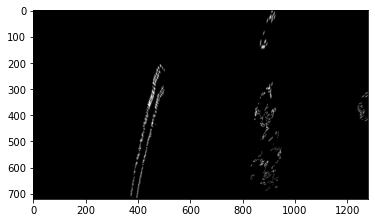

In [575]:
tresholded_img, hoffed = get_tresholded_img(test_img)
tresholded_img = cv2.warpPerspective(tresholded_img,M,None)
plt.imshow(tresholded_img, cmap='gray')

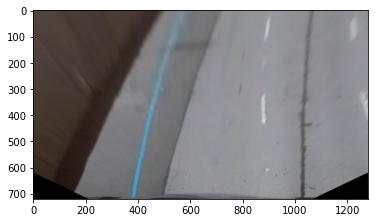

In [576]:
plt.imshow(cv2.warpPerspective(test_img,M,None))